# Основные концепции Machine Learning. Домашняя работа

In [1]:
### Тут нужно сделать импорты всех необходимых библиотек ###
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rc("font", size = 18)

In [3]:
### Здесь требуется загрузить датасет phones.csv ###
phone = pd.read_csv("1.8_phones.csv")
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   disk    100 non-null    int64 
 1   os      100 non-null    object
 2   price   100 non-null    int64 
 3   year    100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [4]:
phone.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


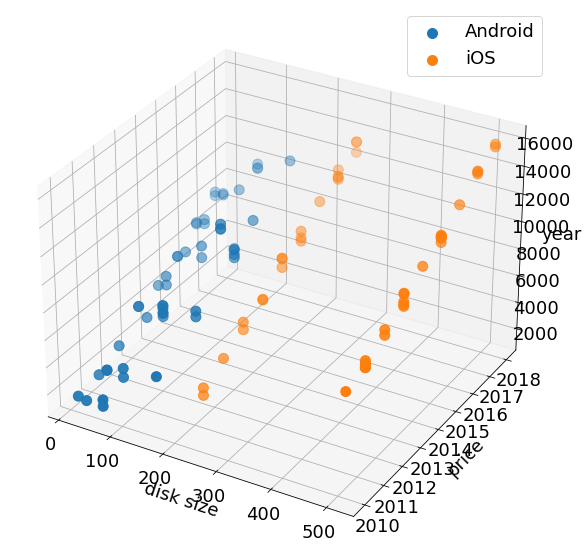

In [5]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
# визуализация по измерениям - диск, цена, год
for index, data in phone.groupby(['os']):
    ax.scatter(data['disk'], data['year'], data['price'],s = 100, label = index)
ax.set_xlabel("disk size")
ax.set_ylabel("price")
ax.set_zlabel('year')
ax.legend()

plt.show()

Задание 1: обучить модель регрессии

In [6]:
# без учета операционной системы

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phone[['disk', 'year']]
y = phone['price']

In [9]:
### Здесь следует запустить процесс обучения ###
reg = LinearRegression().fit(X,y)
[b1,b2] = reg.coef_
a = reg.intercept_
### и продемонстрировать работоспобность обученной модели ###
print(reg.coef_, reg.intercept_)

[  13.57877662 1021.27616528] -2051913.7442219171


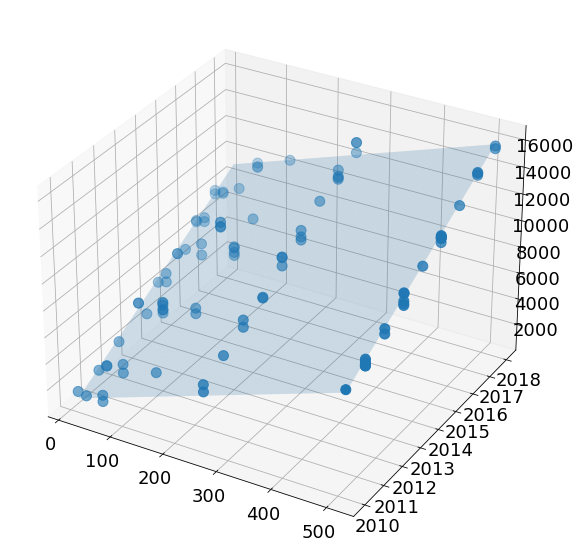

In [10]:
d1, d2 = list(), list()

for x in np.linspace(phone['disk'].min(), phone['disk'].max(), 100):
    for y in np.linspace(phone['year'].min(), phone['year'].max(), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1,1)
d2 = np.array(d2).reshape(-1,1)
#print(np.concatenate([d1,d2], axis = 1),np.concatenate([d1,d2], axis = 1).shape )
p = reg.predict(np.concatenate([d1,d2], axis = 1))


fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.scatter(phone['disk'], phone['year'], phone['price'], s = 100)
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha = 0.2)

plt.show()


In [11]:
# c Учетом операционной системы

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
phone['type'] = phone['os'] == 'Android'
phone['type'].astype(int)
phone

,disk,os,price,year,type
0,64,Android,7256,2016,True
1,128,Android,7623,2015,True
2,64,Android,1916,2010,True
3,512,iOS,15045,2017,False
4,16,Android,4478,2013,True
...,...,...,...,...,...
95,512,iOS,8398,2011,False
96,64,Android,7197,2016,True
97,32,Android,5694,2014,True
98,32,Android,7589,2016,True


In [14]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phone[['disk', 'year', 'type']]
y = phone['price']

In [15]:
### Здесь следует запустить процесс обучения ###
reg = LinearRegression().fit(X,y)
[b1,b2,b3] = reg.coef_
a = reg.intercept_
### и продемонстрировать работоспобность обученной модели ###
print(reg.coef_, reg.intercept_)

[   10.38269781  1012.58504634 -1400.07501073] -2032971.4348703523


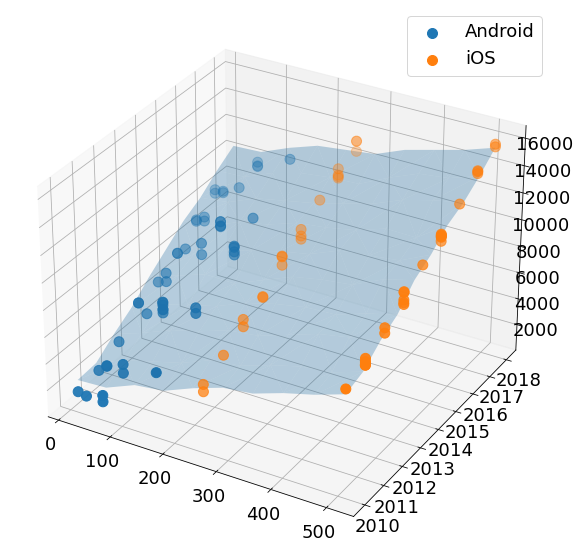

In [74]:
d1, d2, d3 = list(), list(), list()

for x in np.linspace(phone['disk'].min(), phone['disk'].max(), 10):
    for y in np.linspace(phone['year'].min(), phone['year'].max(), 10):
        for z in np.linspace(phone['type'].min(), phone['type'].max(),10):
            d1.append(x)
            d2.append(y)
            d3.append(z)
d1 = np.array(d1).reshape(-1,1)
d2 = np.array(d2).reshape(-1,1)
d3 = np.array(d3).reshape(-1,1)
concat = np.concatenate([d1,d2], axis = 1)
concat = np.concatenate([concat, d3], axis = 1)


p = reg.predict(concat)


fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
for index, data in phone.groupby(['os']):
    ax.scatter(data['disk'], data['year'], data['price'], s = 100, label = index)
ax.plot_trisurf(d1.ravel(), d2.ravel(),  p.ravel(), alpha = 0.3)
plt.legend()
plt.show()

Задание 2: обучить модель классификации

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [76]:
phone['type'] = phone['type'].astype(int)
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phone[["disk","price"]]
y = phone[["type","year"]]

In [77]:
### Здесь следует запустить процесс обучения ###
cl = DecisionTreeClassifier().fit(X,y)
print(export_text(cl))

### и продемонстрировать работоспобность обученной модели ###

|--- feature_0 <= 192.00
|   |--- feature_1 <= 5754.00
|   |   |--- feature_1 <= 3469.00
|   |   |   |--- feature_1 <= 1744.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1744.50
|   |   |   |   |--- feature_0 <= 24.00
|   |   |   |   |   |--- feature_1 <= 2335.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  2335.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  24.00
|   |   |   |   |   |--- feature_1 <= 2096.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  2096.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  3469.00
|   |   |   |--- feature_0 <= 48.00
|   |   |   |   |--- feature_1 <= 4655.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  4655.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  48.00
|   |   |   |   |--- class: 0
|   |--- feature_1 >  5754.00
|   |   |--- feature_1 <= 7852.00
|   |   |   |--- feature_1 <= 7193.00

Задание 3: обучить модель кластеризации

In [78]:
from sklearn.cluster import KMeans

In [79]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phone[['disk', 'price', 'year']]
y = phone['type']

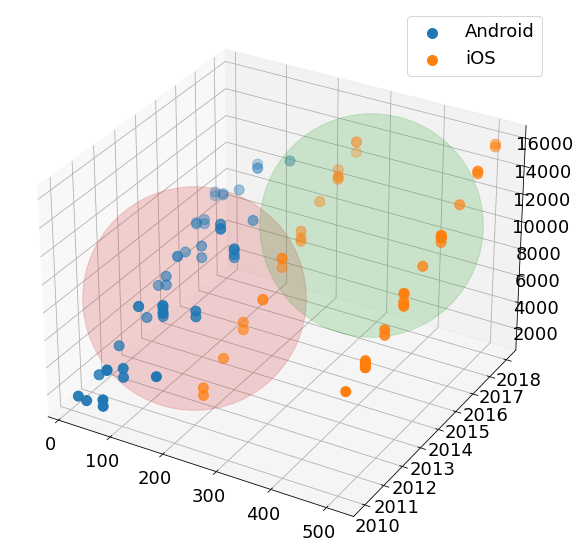

In [84]:
### Здесь следует запустить процесс обучения ###

cluster = KMeans(n_clusters = 2).fit(X,y)

### и продемонстрировать работоспобность обученной модели ###



cl1, cl2 = cluster.cluster_centers_


fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
for index, data in phone.groupby(['os']):
    ax.scatter(data['disk'], data['year'], data['price'], s = 100, label = index)
ax.scatter(cl1[0],cl1[2], cl1[1], s = 50000, alpha = 0.2)
ax.scatter(cl2[0],cl2[2], cl2[1], s = 50000, alpha = 0.2)

plt.legend()
plt.show()



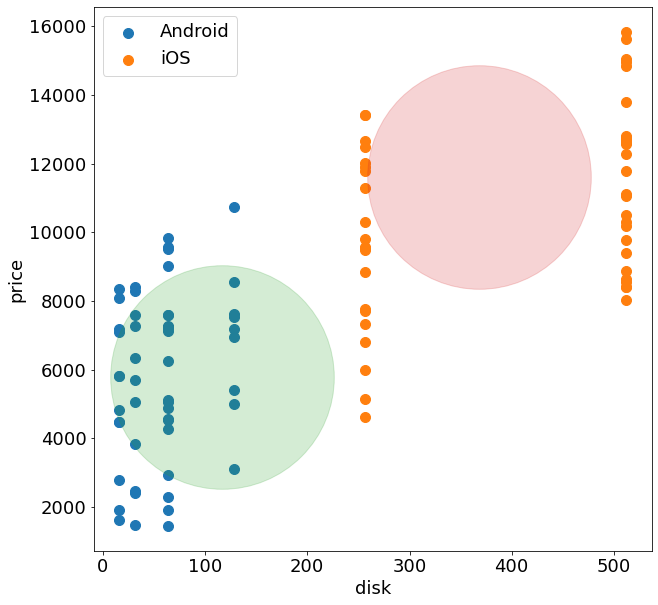

In [85]:
### Здесь следует запустить процесс обучения ###

cluster = KMeans(n_clusters = 2).fit(X,y)


### и продемонстрировать работоспобность обученной модели ###


cl1, cl2 = cluster.cluster_centers_


fig = plt.figure(figsize = (10,10))
ax = plt.axes()
for index, data in phone.groupby(['os']):
    ax.scatter(data['disk'],data['price'], s = 100, label = index)
ax.scatter(cl1[0], cl1[1], s = 50000, alpha = 0.2)
ax.scatter(cl2[0], cl2[1], s = 50000, alpha = 0.2)
ax.set_xlabel('disk')
ax.set_ylabel('price')
plt.legend()
plt.show()
# не понимаю почему цвет 'Android' не такой яркий

